### Hypothesis: Customers who use more scheduled services and have their vehicles serviced at the same dealership where they made their purchase are more likely to purchase multiple vehicles from the manufacturer.
Experiment: Perform a clustering analysis to identify groups of customers who exhibit similar service behaviors and investigate whether these groups have a higher propensity to purchase multiple vehicles.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_repur = pd.read_csv("../repurchase_training.csv")

In [3]:
car_repur.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [4]:
# Importing KMeans clustering package and one hot encoder from sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# one hot encoding for the categorical variables
car_repur = pd.get_dummies(car_repur, columns=['car_model', 'car_segment'])

In [5]:
car_repur.head()

,ID,Target,age_band,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,1,0,3. 35 to 44,Male,9,2,10,3,7,5,...,0,0,0,0,0,0,1,0,0,0
1,2,0,NaN,NaN,6,10,3,10,4,9,...,0,0,0,0,0,0,0,0,0,1
2,3,0,NaN,Male,9,10,9,10,9,10,...,0,0,0,0,0,0,0,1,0,0
3,5,0,NaN,NaN,5,8,5,8,4,5,...,0,0,0,0,0,0,0,1,0,0
4,6,0,NaN,Female,8,9,4,10,7,9,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Feature engineering - taking model 2 because its the highest selling car even for target 1
X = car_repur[['age_of_vehicle_years', 'sched_serv_warr', 'car_model_model_2']].values

In [7]:
# Hyperparameter tuning
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

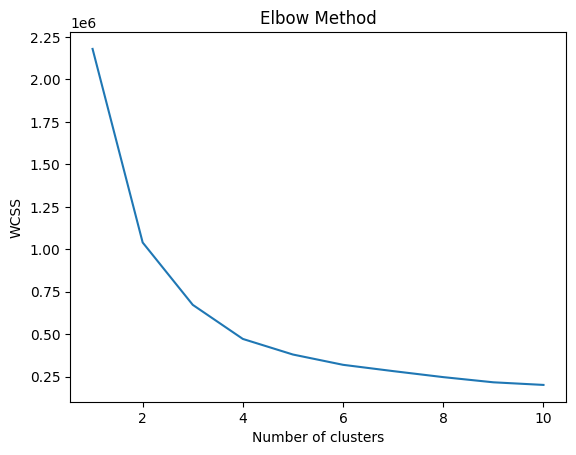

In [8]:
# Plot WCSS vs number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# performing clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=23)
y_kmeans = kmeans.fit_predict(X)

In [11]:
# Interpretating the cluster for car model 2
car_repur['cluster'] = y_kmeans
model_2_cluster = car_repur[car_repur['car_model_model_2']==1]['cluster'].mode()[0]
print("The majority of customers who have previously purchased a model 2 car belong to cluster", model_2_cluster)

The majority of customers who have previously purchased a model 2 car belong to cluster 0


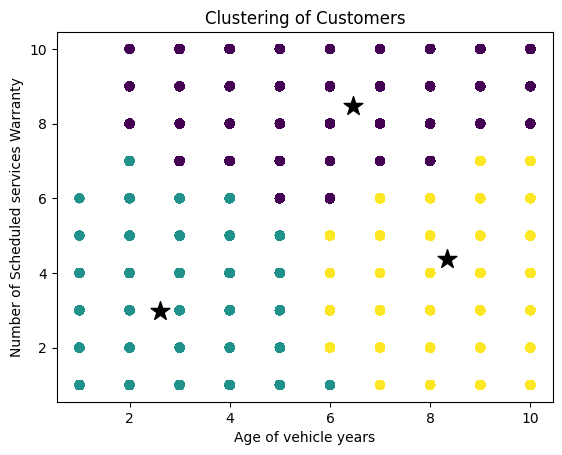

In [12]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, color='black')

# Add labels and title
plt.xlabel('Age of vehicle years')
plt.ylabel('Number of Scheduled services Warranty')
plt.title('Clustering of Customers')
plt.show()


The clustering analysis can help us understand: </br>
<b>Customers who have previously bought car_model_2 automobiles are largely grouped together, this may indicate that they have shared traits or preferences that make them more likely to buy another car from the dealer.</b>

Additionally, we may also determine which consumers are more likely to make repeated purchases by identifying clusters that have a higher percentage of customers who have bought several cars (i.e. target 1).

In [14]:
# importing pickle library
import pickle
# choose the filename you want
filename = '../models/kmeans_model_exp4.sav'
# dump the model
pickle.dump(kmeans, open(filename, 'wb'))